In [2]:
import pandas as pd # pannel datasets
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from arch import arch_model
from calendar import monthrange, month_name
from tqdm.notebook import tqdm
import seaborn as sns
import pylab
import scipy.stats as stats

In [14]:
# load the data using pandas
df1 = pd.read_excel('EDP RENOVAVEISprice.xlsx', engine="openpyxl")
df2 = pd.read_excel('GALP ENERGIA-NOMprice.xlsx', engine="openpyxl")
df3 = pd.read_excel('MOTA ENGILprice.xlsx', engine="openpyxl")
df4 = pd.read_excel('NOSSGPSprice.xlsx', engine="openpyxl")
df5 = pd.read_excel('NOVABASESGPSprice.xlsx', engine="openpyxl")
#removing first three rows
df1 = df1.drop([0,1,2])
df2 = df2.drop([0,1,2])
df3 = df3.drop([0,1,2])
df4 = df4.drop([0,1,2])
df5 = df5.drop([0,1,2])
df1.head()

,Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
3,2022-03-11 00:00:00,22.76,23.02,22.34,22.66,993763,2859,22532862,22.6743
4,2022-03-10 00:00:00,23.18,23.56,22.2,22.7,1071716,3942,24332142,22.7039
5,2022-03-09 00:00:00,23.22,23.76,22.2,23.18,1504596,4702,34471844,22.911
6,2022-03-08 00:00:00,21.5,23,21.5,22.62,1851121,6269,41788673,22.5748
7,2022-03-07 00:00:00,20.54,22.06,20.4,21.76,1630709,4034,35106991,21.5287


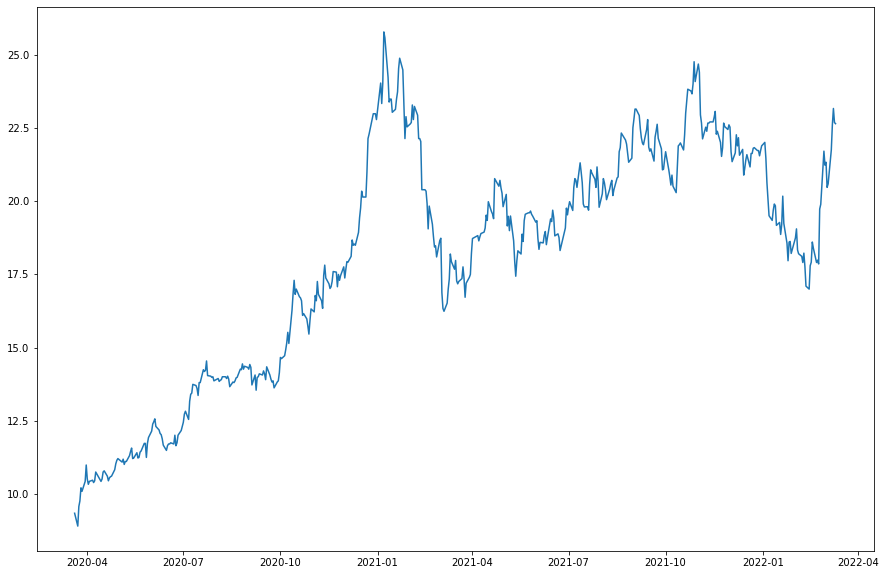

In [7]:
#untransformed data
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(df1['Historical Data'], df1['Unnamed: 4'])

In [18]:
#Calculate log-returns for daily closing of all nine series
edp_log = np.log(df1['Unnamed: 4'].astype('float')/df1['Unnamed: 1'].astype('float'))
galp_log = np.log(df2['Unnamed: 4'].astype('float')/df2['Unnamed: 1'].astype('float').shift(1))
mota_log = np.log(df3['Unnamed: 4'].astype('float')/df3['Unnamed: 1'].astype('float').shift(1)) 
noss_log = np.log(df4['Unnamed: 4'].astype('float')/df4['Unnamed: 1'].astype('float').shift(1)) 
nova_log = np.log(df5['Unnamed: 4'].astype('float')/df5['Unnamed: 1'].astype('float').shift(1)) 
#based on https://mlforanalytics.com/2019/09/25/financial-analytics-log-returns-using-python/

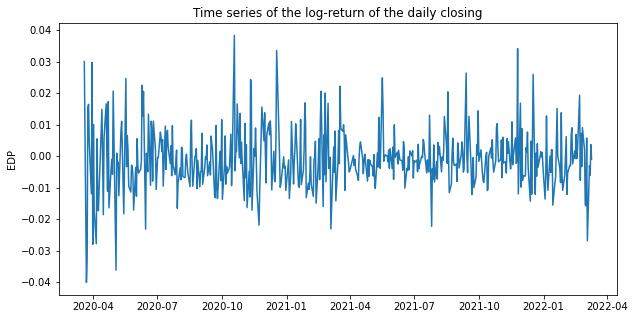

In [19]:
#Time plot

# Time span
dates = df2['Historical Data'] #all series have the same dates

plt.figure(figsize=(10, 5))
plt.title('Time series of the log-return of the daily closing')
plt.ylabel('EDP')
plt.plot_date(dates,galp_log, '-')
#change of variance = appropiate for GARCH model

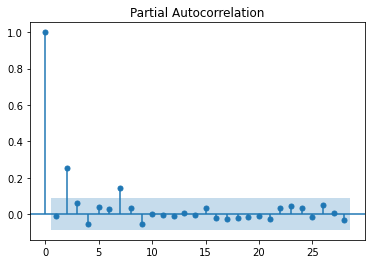

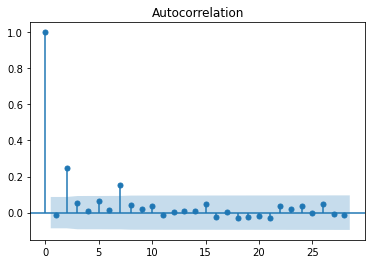

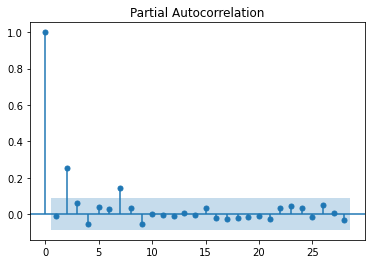

In [20]:
#TODO: plot ACF and PACF of the variance, to estimate values for p and q just like the ARIMA model, 
#the mean is 0? so the variance is just the square of the data

#squared_data = [x**2 for x in edp_log]
edp_square = np.square(edp_log)
# create acf plot
plot_acf(edp_square)
plot_pacf(edp_square)

In [38]:
model = arch_model(mota_log, vol='GARCH', p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2962755.2615781673
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2149767.9995878683
Iteration:      3,   Func. Count:     30,   Neg. LLF: 987960482781.1937
Iteration:      4,   Func. Count:     43,   Neg. LLF: 80367438.58711141
Iteration:      5,   Func. Count:     57,   Neg. LLF: 2430.669017823767
Iteration:      6,   Func. Count:     67,   Neg. LLF: 878630440.1575246
Iteration:      7,   Func. Count:     79,   Neg. LLF: 333733231.05774665
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1201.0680979762797
            Iterations: 9
            Function evaluations: 89
            Gradient evaluations: 7


C:\Users\agnes\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007923. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Unnamed: 4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1201.07
Distribution:                  Normal   AIC:                          -2394.14
Method:            Maximum Likelihood   BIC:                          -2377.21
                                        No. Observations:                  508
Date:                Fri, May 27 2022   Df Residuals:                      507
Time:                        11:52:03   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.5060e-04  9.103e-04     -0.385      0.700 [-2.135e-03,1.434e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.6856e-05  7.243e-10  2.327e+04      0.000 [1.685e-05,1.686e-05]
alpha[1]       0.2001  6.890e-02      2.904  3.681e-03   [6.506e-02,  0.335]
beta[1]        0.7799  5.163e-02     15.105  1.495e-51     [  0.679,  0.881]
============================================================================

Covariance estimator: robust
"""